In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [92]:
coffee_production = pd.read_csv('../Data/Raw/coffee_production/Coffee_production.csv')
print(coffee_production.head())
print(coffee_production.shape)
coffee_production

                            Country      Coffee type       1990/91  \
0                            Angola  Robusta/Arabica  3.000000e+06   
1  Bolivia (Plurinational State of)          Arabica  7.380000e+06   
2                            Brazil  Arabica/Robusta  1.637160e+09   
3                           Burundi  Arabica/Robusta  2.922000e+07   
4                           Ecuador  Arabica/Robusta  9.024000e+07   

        1991/92       1992/93       1993/94       1994/95       1995/96  \
0  4.740000e+06  4.680000e+06  1.980000e+06  4.620000e+06  3.720000e+06   
1  6.240000e+06  7.200000e+06  3.060000e+06  7.020000e+06  8.520000e+06   
2  1.637580e+09  2.076180e+09  1.690020e+09  1.691520e+09  1.083600e+09   
3  4.002000e+07  3.720000e+07  2.358000e+07  3.984000e+07  2.604000e+07   
4  1.274400e+08  7.110000e+07  1.241400e+08  1.425600e+08  1.132800e+08   

        1996/97       1997/98  ...       2011/12       2012/13       2013/14  \
0  4.260000e+06  3.840000e+06  ...  1.740000e+06

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09
5,Indonesia,Robusta/Arabica,4.464600e+08,5.095800e+08,3.341400e+08,4.045800e+08,3.220800e+08,2.743800e+08,4.932600e+08,4.572600e+08,...,4.133400e+08,7.842000e+08,7.740600e+08,6.567600e+08,7.551000e+08,6.924600e+08,6.511200e+08,5.770800e+08,6.859800e+08,1.540488e+10
6,Madagascar,Robusta,5.892000e+07,5.598000e+07,6.732000e+07,2.652000e+07,3.846000e+07,4.710000e+07,5.094000e+07,3.744000e+07,...,3.510000e+07,3.000000e+07,3.504000e+07,3.006000e+07,2.484000e+07,2.718000e+07,2.424000e+07,2.274000e+07,2.298000e+07,1.045560e+09
7,Malawi,Arabica,6.300000e+06,7.440000e+06,8.220000e+06,3.720000e+06,5.040000e+06,5.460000e+06,2.940000e+06,3.660000e+06,...,1.560000e+06,1.380000e+06,1.680000e+06,1.500000e+06,1.260000e+06,1.200000e+06,8.400000e+05,7.800000e+05,9.600000e+05,8.226000e+07
8,Papua New Guinea,Arabica/Robusta,5.778000e+07,4.482000e+07,5.400000e+07,6.114000e+07,6.834000e+07,6.012000e+07,6.534000e+07,6.444000e+07,...,8.484000e+07,4.296000e+07,5.010000e+07,4.788000e+07,4.272000e+07,7.026000e+07,4.404000e+07,5.580000e+07,4.512000e+07,1.803120e+09
9,Paraguay,Arabica,7.860000e+06,4.800000e+06,3.240000e+06,4.020000e+06,1.500000e+06,1.560000e+06,1.860000e+06,2.940000e+06,...,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,6.222000e+07


In [93]:
# Delete 'Total_production' as aggregates will be computed through yearly summation
del coffee_production['Total_production']

# Columns to remain unchanged
id_vars = ['Country', 'Coffee type']

# Melt to reshape the DataFrame with one row for each column 
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
coffee_production_unpivoted = pd.melt(coffee_production, id_vars=id_vars, var_name='Year', value_name='Total Production')

# Display the resulting DataFrame
coffee_production_unpivoted

,Country,Coffee type,Year,Total Production
0,Angola,Robusta/Arabica,1990/91,3.000000e+06
1,Bolivia (Plurinational State of),Arabica,1990/91,7.380000e+06
2,Brazil,Arabica/Robusta,1990/91,1.637160e+09
3,Burundi,Arabica/Robusta,1990/91,2.922000e+07
4,Ecuador,Arabica/Robusta,1990/91,9.024000e+07
...,...,...,...,...
1645,Trinidad & Tobago,Robusta,2019/20,7.200000e+05
1646,Uganda,Robusta/Arabica,2019/20,3.305400e+08
1647,Venezuela,Arabica,2019/20,3.900000e+07
1648,Viet Nam,Robusta/Arabica,2019/20,1.829220e+09


In [94]:
# Split by '/' delimiter to obtain just 1st year
coffee_production_split = coffee_production_unpivoted['Year'].str.split('/', expand=True)

# From index[0], append year back to orig df
coffee_production_unpivoted['Years'] = coffee_production_split[0]

# Delete previous 'Year' column
del coffee_production_unpivoted['Year']

# Rename df
coffee_production_cleaned = coffee_production_unpivoted

# New order of df 
new_order = ['Country', 'Coffee type', 'Years', 'Total Production']

# Set new order of df back to orig
coffee_production_cleaned = coffee_production_cleaned[new_order]

# Last clean on Bolivia to just have country name
bolivia_clean = coffee_production_cleaned['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
coffee_production_cleaned['Country'] = bolivia_clean

# Display cleaned df
coffee_production_cleaned

,Country,Coffee type,Years,Total Production
0,Angola,Robusta/Arabica,1990,3.000000e+06
1,Bolivia,Arabica,1990,7.380000e+06
2,Brazil,Arabica/Robusta,1990,1.637160e+09
3,Burundi,Arabica/Robusta,1990,2.922000e+07
4,Ecuador,Arabica/Robusta,1990,9.024000e+07
...,...,...,...,...
1645,Trinidad & Tobago,Robusta,2019,7.200000e+05
1646,Uganda,Robusta/Arabica,2019,3.305400e+08
1647,Venezuela,Arabica,2019,3.900000e+07
1648,Viet Nam,Robusta/Arabica,2019,1.829220e+09


In [95]:
# Save .csv to 'Cleaned' folder
coffee_production_cleaned.to_csv('../Data/Cleaned/coffee_production_cleaned.csv', index=False)


In [96]:
years_df = coffee_production_cleaned.set_index("Years")
years_df = years_df.drop("Coffee type",axis=1)
years_df

,Country,Total Production
Years,,
1990,Angola,3.000000e+06
1990,Bolivia,7.380000e+06
1990,Brazil,1.637160e+09
1990,Burundi,2.922000e+07
1990,Ecuador,9.024000e+07
...,...,...
2019,Trinidad & Tobago,7.200000e+05
2019,Uganda,3.305400e+08
2019,Venezuela,3.900000e+07


In [97]:
years_pivot = years_df.pivot(columns="Country",values="Total Production")
years_pivot

Country,Angola,Bolivia,Brazil,Burundi,Cameroon,Central African Republic,Colombia,Congo,Costa Rica,Cuba,...,Thailand,Timor-Leste,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen,Zambia,Zimbabwe
Years,,,,,,,,,,,,,,,,,,,,,
1990,3000000.0,7380000.0,1.637160e+09,29220000.0,100920000.0,10500000.0,8.637600e+08,180000.0,153720000.0,24840000.0,...,45420000.0,0.0,9660000.0,900000.0,117300000.0,67320000.0,7.860000e+07,0.0,1380000.0,15120000.0
1991,4740000.0,6240000.0,1.637580e+09,40020000.0,103560000.0,7500000.0,1.078800e+09,180000.0,165600000.0,18120000.0,...,88140000.0,0.0,25980000.0,1080000.0,125280000.0,56460000.0,8.628000e+07,0.0,1740000.0,12060000.0
1992,4680000.0,7200000.0,2.076180e+09,37200000.0,15600000.0,8040000.0,8.968200e+08,180000.0,179880000.0,17040000.0,...,75300000.0,0.0,5160000.0,840000.0,131100000.0,72900000.0,1.404000e+08,0.0,1740000.0,4680000.0
1993,1980000.0,3060000.0,1.690020e+09,23580000.0,40980000.0,9960000.0,6.853200e+08,180000.0,141540000.0,17100000.0,...,76500000.0,0.0,11700000.0,960000.0,188520000.0,79980000.0,1.812000e+08,0.0,1620000.0,720000.0
1994,4620000.0,7020000.0,1.691520e+09,39840000.0,24360000.0,15000000.0,7.778400e+08,480000.0,148920000.0,17040000.0,...,83940000.0,0.0,10560000.0,1080000.0,143580000.0,59340000.0,2.179200e+08,0.0,1260000.0,6360000.0
1995,3720000.0,8520000.0,1.083600e+09,26040000.0,39600000.0,6480000.0,7.762800e+08,720000.0,170640000.0,17100000.0,...,79020000.0,0.0,5040000.0,1080000.0,194640000.0,88020000.0,2.382000e+08,0.0,1560000.0,7860000.0
1996,4260000.0,7500000.0,1.751820e+09,24060000.0,85920000.0,12480000.0,6.467400e+08,840000.0,133320000.0,21960000.0,...,84240000.0,0.0,17460000.0,1080000.0,205140000.0,72360000.0,3.451200e+08,0.0,1980000.0,10440000.0
1997,3840000.0,8460000.0,1.568880e+09,15000000.0,53340000.0,6840000.0,7.273200e+08,180000.0,157020000.0,18000000.0,...,77580000.0,0.0,13260000.0,1140000.0,206400000.0,57060000.0,4.187400e+08,0.0,2280000.0,7800000.0
1998,5100000.0,8280000.0,2.205660e+09,29520000.0,66840000.0,12900000.0,6.520800e+08,180000.0,146700000.0,16800000.0,...,54960000.0,0.0,19260000.0,1020000.0,203160000.0,95820000.0,4.231200e+08,4140000.0,3720000.0,8940000.0


<Axes: xlabel='Years'>

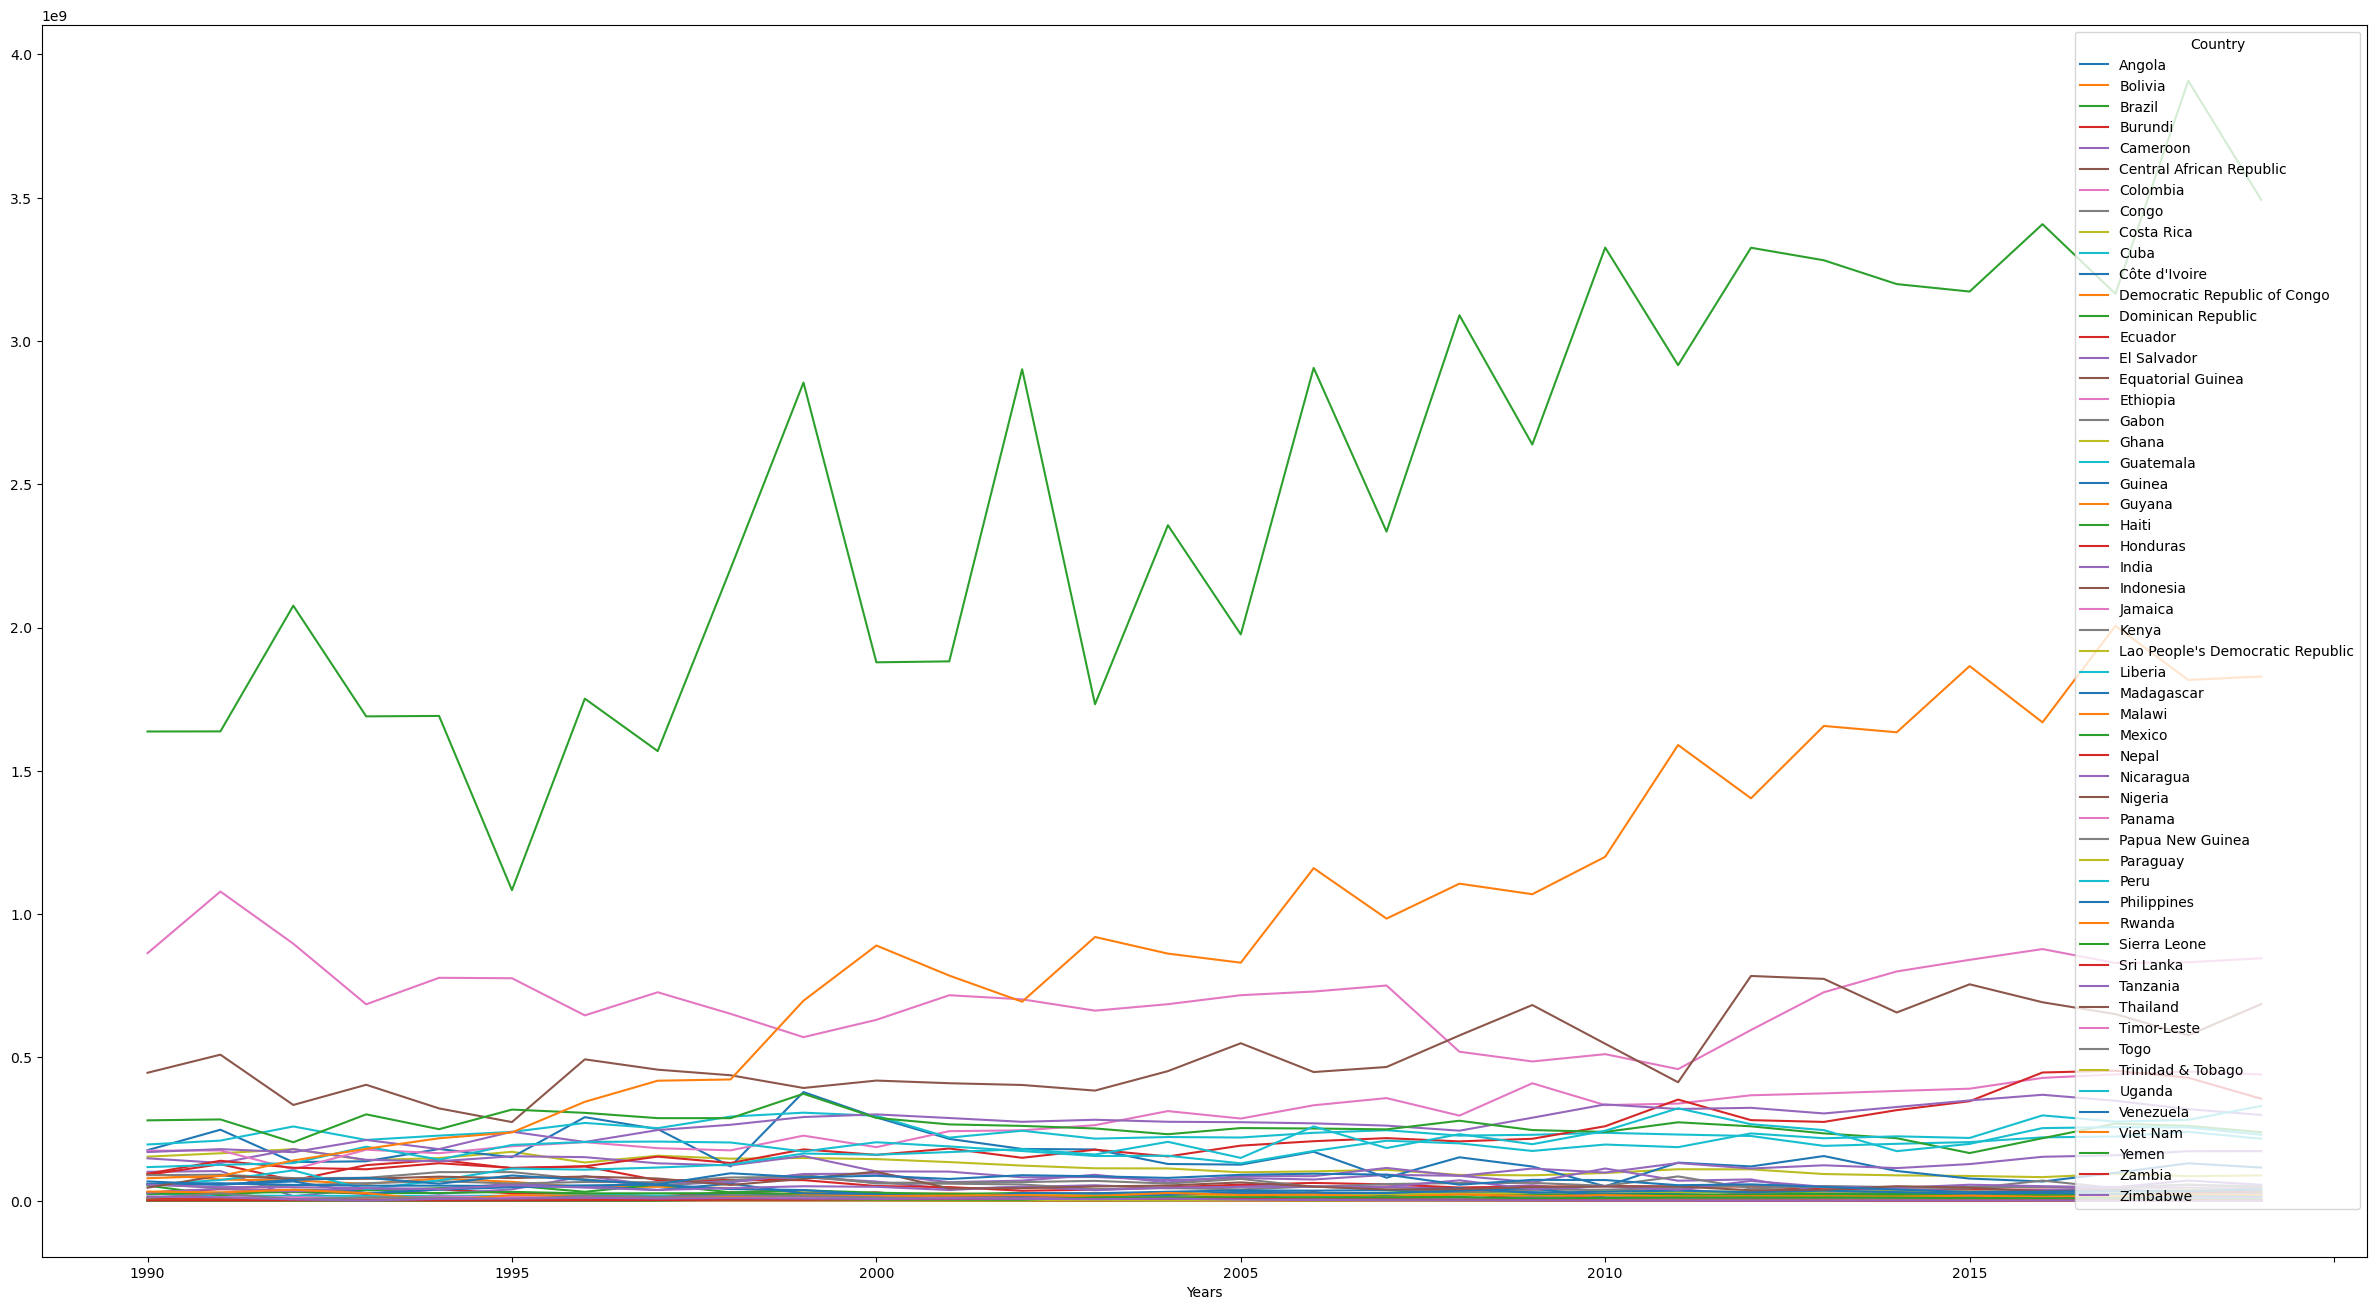

In [107]:
years_pivot.plot(figsize=(30,16))

In [99]:
country_df = coffee_production_cleaned.set_index("Country")
country_df = country_df.drop("Coffee type",axis=1)
country_df

,Years,Total Production
Country,,
Angola,1990,3.000000e+06
Bolivia,1990,7.380000e+06
Brazil,1990,1.637160e+09
Burundi,1990,2.922000e+07
Ecuador,1990,9.024000e+07
...,...,...
Trinidad & Tobago,2019,7.200000e+05
Uganda,2019,3.305400e+08
Venezuela,2019,3.900000e+07


In [103]:
country_pivot = country_df.pivot(columns="Years",values="Total Production")
country_pivot.head()

Years,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Angola,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,5.100000e+06,3.300000e+06,...,2.100000e+06,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06
Bolivia,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,8.280000e+06,9.480000e+06,...,7.020000e+06,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06
Brazil,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,2.205660e+09,2.854680e+09,...,3.325680e+09,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09
Burundi,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,2.952000e+07,2.106000e+07,...,2.118000e+07,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07
Cameroon,1.009200e+08,1.035600e+08,1.560000e+07,4.098000e+07,2.436000e+07,3.960000e+07,8.592000e+07,5.334000e+07,6.684000e+07,8.220000e+07,...,3.162000e+07,4.014000e+07,2.226000e+07,2.424000e+07,2.898000e+07,2.346000e+07,1.752000e+07,2.220000e+07,1.860000e+07,1.608000e+07


<Axes: xlabel='Years'>

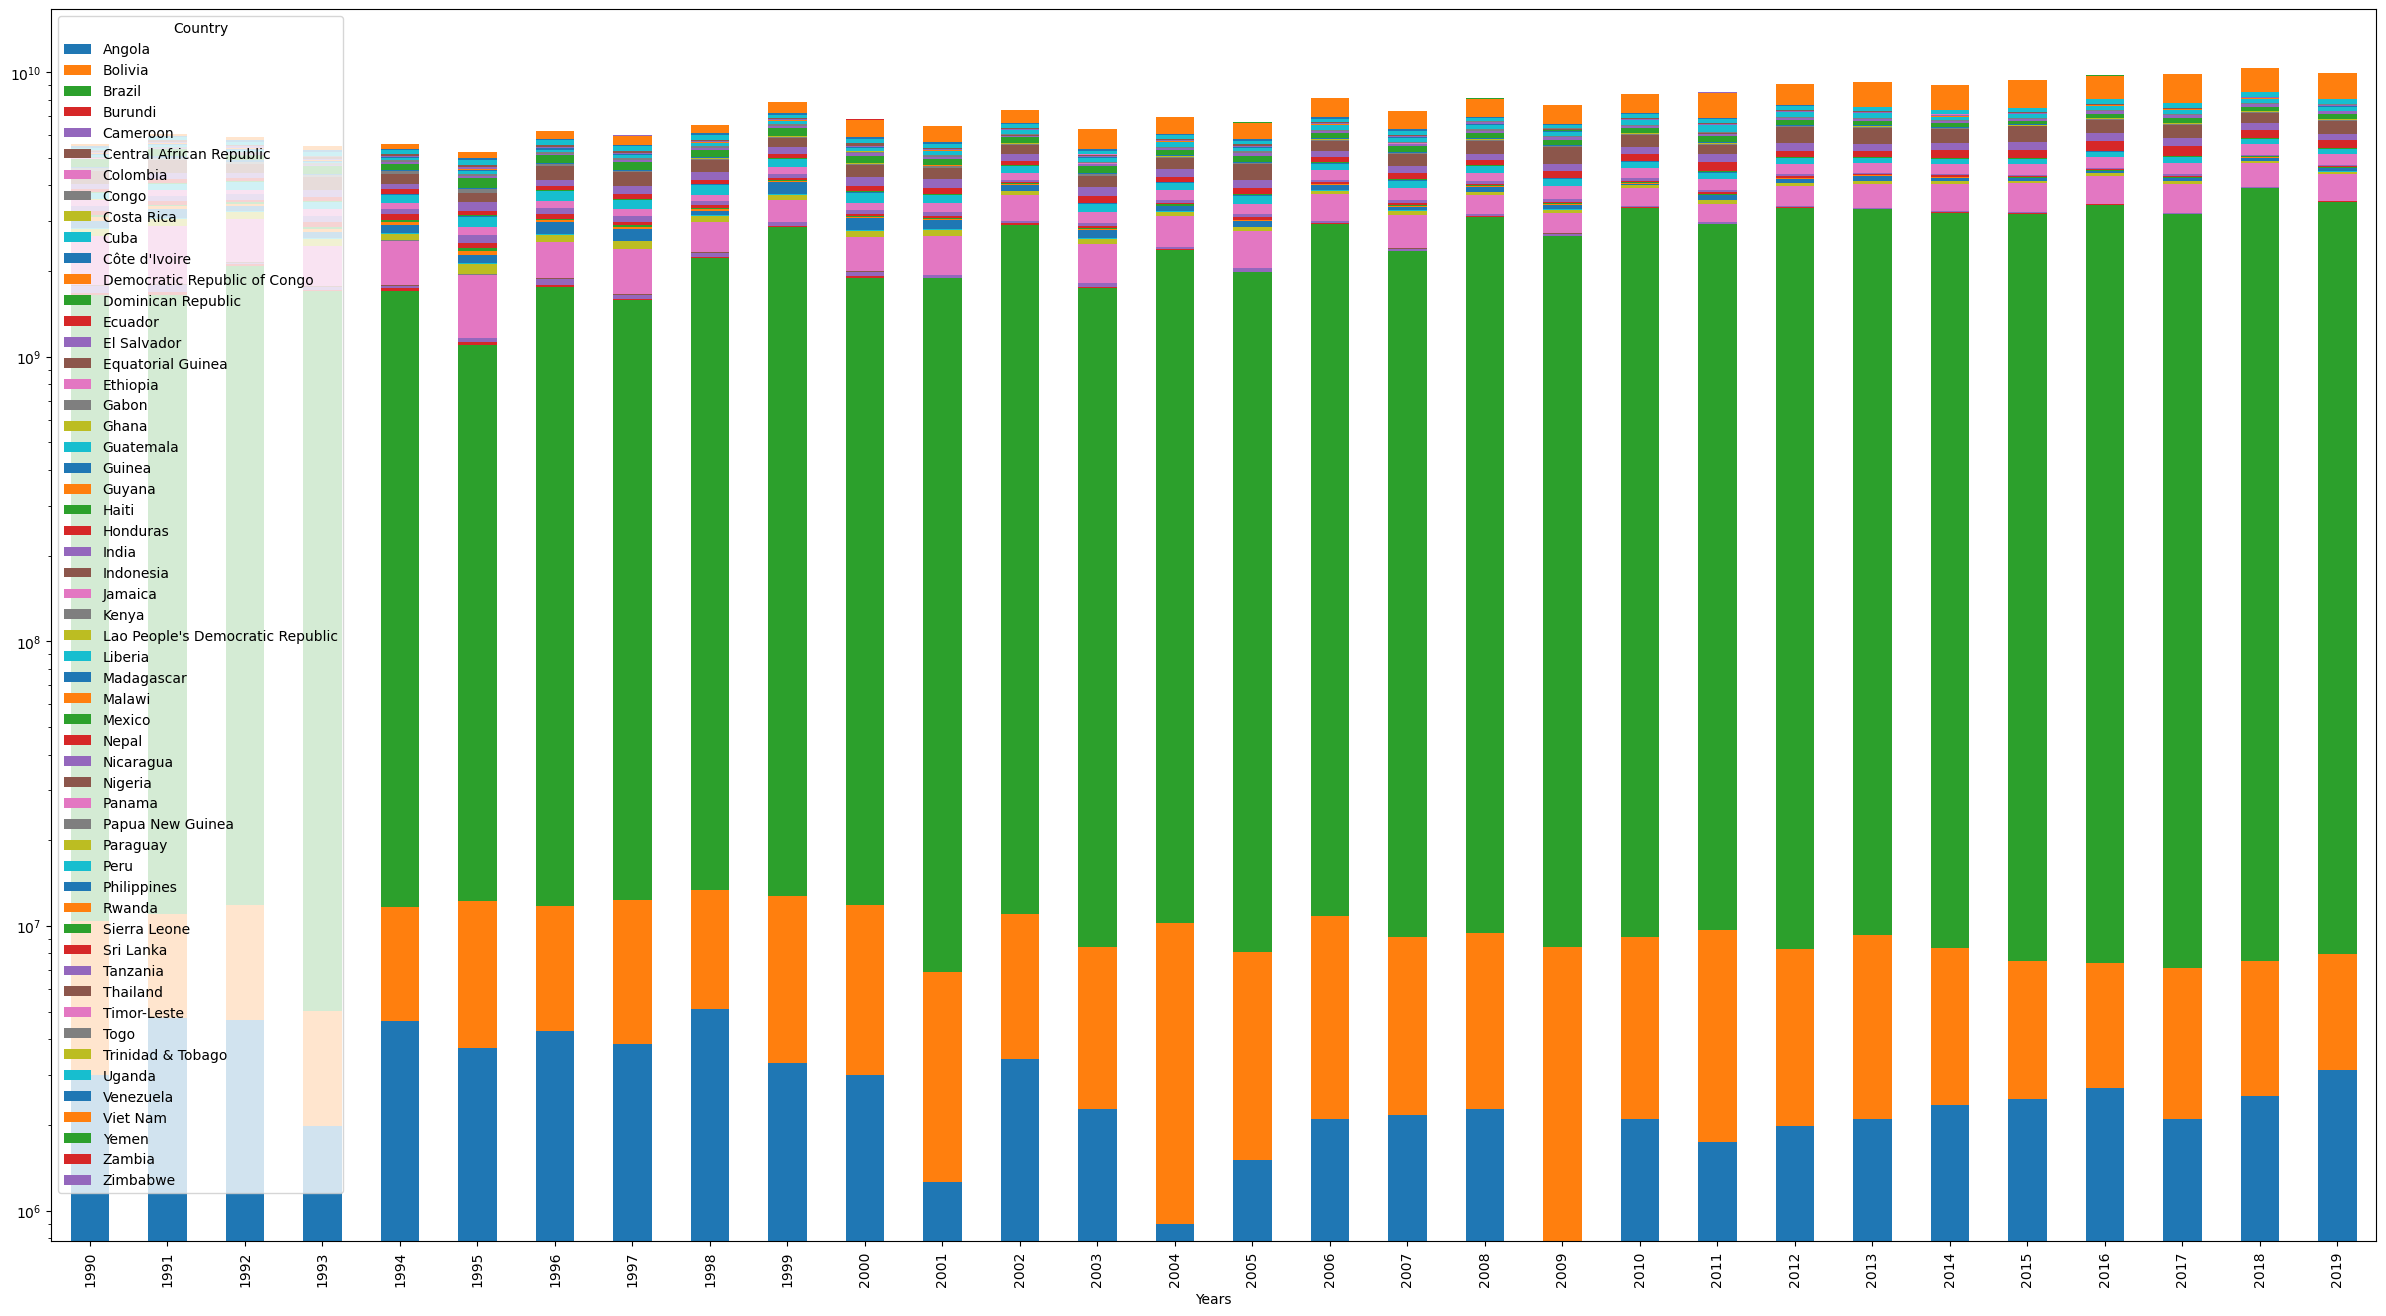

In [105]:
ax = years_pivot.plot.bar(logy=True,stacked=True, figsize=(30,16))
ax

In [150]:
total = coffee_production_cleaned.groupby("Country")["Total Production"].sum()
total = pd.DataFrame({"Total":total})
production_sort = total.sort_values("Total",ascending=False)
production_sort.head(10)

,Total
Country,
Brazil,7.508298e+10
Viet Nam,2.880318e+10
Colombia,2.159862e+10
Indonesia,1.540488e+10
Ethiopia,8.669520e+09
India,8.222220e+09
Mexico,7.853520e+09
Guatemala,7.020540e+09
Honduras,6.672720e+09


In [175]:
top_prod_df = production_sort.head(10)
top_prod_df.index.values

array(['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'India',
       'Mexico', 'Guatemala', 'Honduras', 'Uganda'], dtype=object)

In [186]:
top_countries_df = coffee_production_cleaned[coffee_production_cleaned['Country'].isin(top_prod_df.index.values)]
top_countries_df

,Country,Coffee type,Years,Total Production
2,Brazil,Arabica/Robusta,1990,1.637160e+09
5,Indonesia,Robusta/Arabica,1990,4.464600e+08
23,Colombia,Arabica,1990,8.637600e+08
29,Ethiopia,Arabica,1990,1.745400e+08
32,Guatemala,Arabica/Robusta,1990,1.962600e+08
...,...,...,...,...
1630,Honduras,Arabica,2019,3.558600e+08
1631,India,Robusta/Arabica,2019,2.992800e+08
1636,Mexico,Arabica/Robusta,2019,2.391000e+08
1646,Uganda,Robusta/Arabica,2019,3.305400e+08


In [191]:
years_countries_df = top_countries_df.set_index("Years")
years_countries_df = years_countries_df.drop("Coffee type",axis=1)
years_countries_df

,Country,Total Production
Years,,
1990,Brazil,1.637160e+09
1990,Indonesia,4.464600e+08
1990,Colombia,8.637600e+08
1990,Ethiopia,1.745400e+08
1990,Guatemala,1.962600e+08
...,...,...
2019,Honduras,3.558600e+08
2019,India,2.992800e+08
2019,Mexico,2.391000e+08


In [192]:
years_countries_pivot = years_countries_df.pivot(columns="Country",values="Total Production")
years_countries_pivot

Country,Brazil,Colombia,Ethiopia,Guatemala,Honduras,India,Indonesia,Mexico,Uganda,Viet Nam
Years,,,,,,,,,,
1990,1.637160e+09,8.637600e+08,174540000.0,196260000.0,94080000.0,169740000.0,446460000.0,280440000.0,117300000.0,7.860000e+07
1991,1.637580e+09,1.078800e+09,175500000.0,209820000.0,139320000.0,180000000.0,509580000.0,283620000.0,125280000.0,8.628000e+07
1992,2.076180e+09,8.968200e+08,109500000.0,259080000.0,115080000.0,169380000.0,334140000.0,204060000.0,131100000.0,1.404000e+08
1993,1.690020e+09,6.853200e+08,178020000.0,212160000.0,109740000.0,211980000.0,404580000.0,301380000.0,188520000.0,1.812000e+08
1994,1.691520e+09,7.778400e+08,165780000.0,227220000.0,130860000.0,180120000.0,322080000.0,249540000.0,143580000.0,2.179200e+08
1995,1.083600e+09,7.762800e+08,189900000.0,240120000.0,114540000.0,240720000.0,274380000.0,318000000.0,194640000.0,2.382000e+08
1996,1.751820e+09,6.467400e+08,204420000.0,271500000.0,120240000.0,205020000.0,493260000.0,306600000.0,205140000.0,3.451200e+08
1997,1.568880e+09,7.273200e+08,183420000.0,253140000.0,153840000.0,246540000.0,457260000.0,288120000.0,206400000.0,4.187400e+08
1998,2.205660e+09,6.520800e+08,175680000.0,293580000.0,131700000.0,265020000.0,437760000.0,288060000.0,203160000.0,4.231200e+08


<Axes: xlabel='Years'>

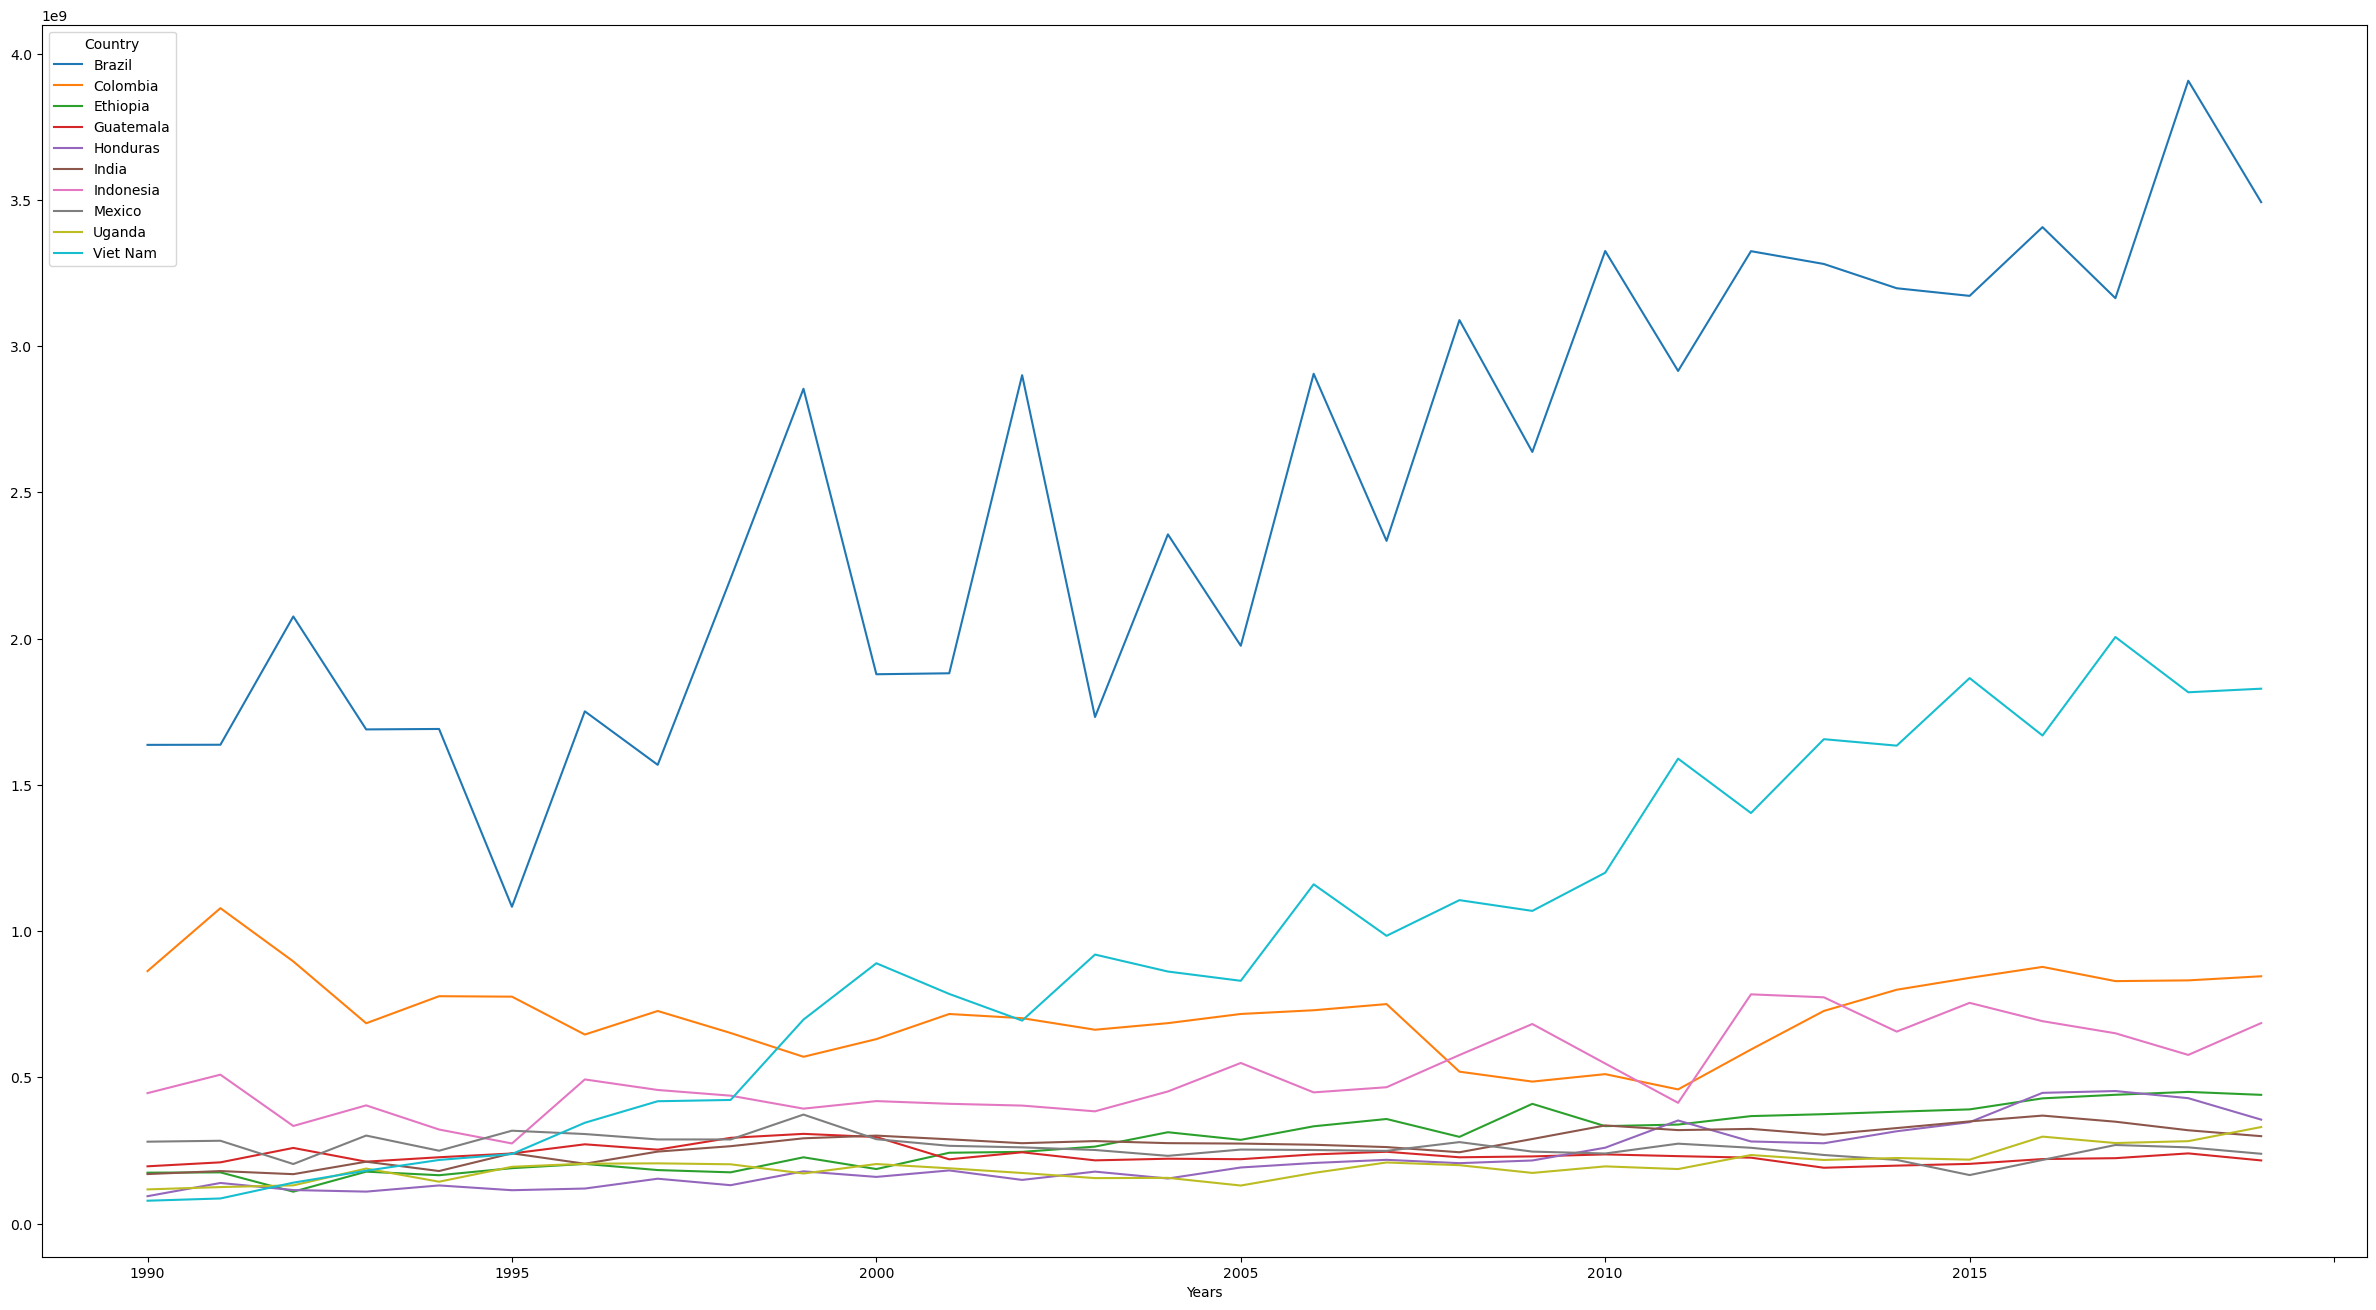

In [193]:
years_countries_pivot.plot(figsize=(30,16))

In [194]:
country_prod_df = top_countries_df.set_index("Country")
country_prod_df = country_prod_df.drop("Coffee type",axis=1)
country_prod_df

,Years,Total Production
Country,,
Brazil,1990,1.637160e+09
Indonesia,1990,4.464600e+08
Colombia,1990,8.637600e+08
Ethiopia,1990,1.745400e+08
Guatemala,1990,1.962600e+08
...,...,...
Honduras,2019,3.558600e+08
India,2019,2.992800e+08
Mexico,2019,2.391000e+08


In [196]:
country_prod_pivot = country_prod_df.pivot(columns="Years",values="Total Production")
country_prod_pivot

Years,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,2.205660e+09,2.854680e+09,...,3.325680e+09,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09
Colombia,8.637600e+08,1.078800e+09,8.968200e+08,6.853200e+08,7.778400e+08,7.762800e+08,6.467400e+08,7.273200e+08,6.520800e+08,5.707200e+08,...,5.113800e+08,4.591800e+08,5.956200e+08,7.274400e+08,7.999800e+08,8.405400e+08,8.780400e+08,8.294400e+08,8.319600e+08,8.460000e+08
Ethiopia,1.745400e+08,1.755000e+08,1.095000e+08,1.780200e+08,1.657800e+08,1.899000e+08,2.044200e+08,1.834200e+08,1.756800e+08,2.270400e+08,...,3.336000e+08,3.390000e+08,3.679200e+08,3.745200e+08,3.829800e+08,3.909000e+08,4.285800e+08,4.408200e+08,4.506600e+08,4.405800e+08
Guatemala,1.962600e+08,2.098200e+08,2.590800e+08,2.121600e+08,2.272200e+08,2.401200e+08,2.715000e+08,2.531400e+08,2.935800e+08,3.072000e+08,...,2.370000e+08,2.310000e+08,2.257800e+08,1.913400e+08,1.986000e+08,2.046000e+08,2.210400e+08,2.240400e+08,2.404200e+08,2.163600e+08
Honduras,9.408000e+07,1.393200e+08,1.150800e+08,1.097400e+08,1.308600e+08,1.145400e+08,1.202400e+08,1.538400e+08,1.317000e+08,1.791000e+08,...,2.598600e+08,3.529200e+08,2.811600e+08,2.749800e+08,3.160800e+08,3.471600e+08,4.474200e+08,4.536000e+08,4.291800e+08,3.558600e+08
India,1.697400e+08,1.800000e+08,1.693800e+08,2.119800e+08,1.801200e+08,2.407200e+08,2.050200e+08,2.465400e+08,2.650200e+08,2.920200e+08,...,3.360000e+08,3.200400e+08,3.241800e+08,3.045000e+08,3.270000e+08,3.498000e+08,3.696600e+08,3.487800e+08,3.195000e+08,2.992800e+08
Indonesia,4.464600e+08,5.095800e+08,3.341400e+08,4.045800e+08,3.220800e+08,2.743800e+08,4.932600e+08,4.572600e+08,4.377600e+08,3.934200e+08,...,5.477400e+08,4.133400e+08,7.842000e+08,7.740600e+08,6.567600e+08,7.551000e+08,6.924600e+08,6.511200e+08,5.770800e+08,6.859800e+08
Mexico,2.804400e+08,2.836200e+08,2.040600e+08,3.013800e+08,2.495400e+08,3.180000e+08,3.066000e+08,2.881200e+08,2.880600e+08,3.731400e+08,...,2.400600e+08,2.736600e+08,2.596200e+08,2.349600e+08,2.181600e+08,1.663200e+08,2.181000e+08,2.691000e+08,2.610600e+08,2.391000e+08
Uganda,1.173000e+08,1.252800e+08,1.311000e+08,1.885200e+08,1.435800e+08,1.946400e+08,2.051400e+08,2.064000e+08,2.031600e+08,1.717200e+08,...,1.960200e+08,1.869000e+08,2.348400e+08,2.179800e+08,2.246400e+08,2.190000e+08,2.977200e+08,2.758200e+08,2.822400e+08,3.305400e+08


<Axes: xlabel='Years'>

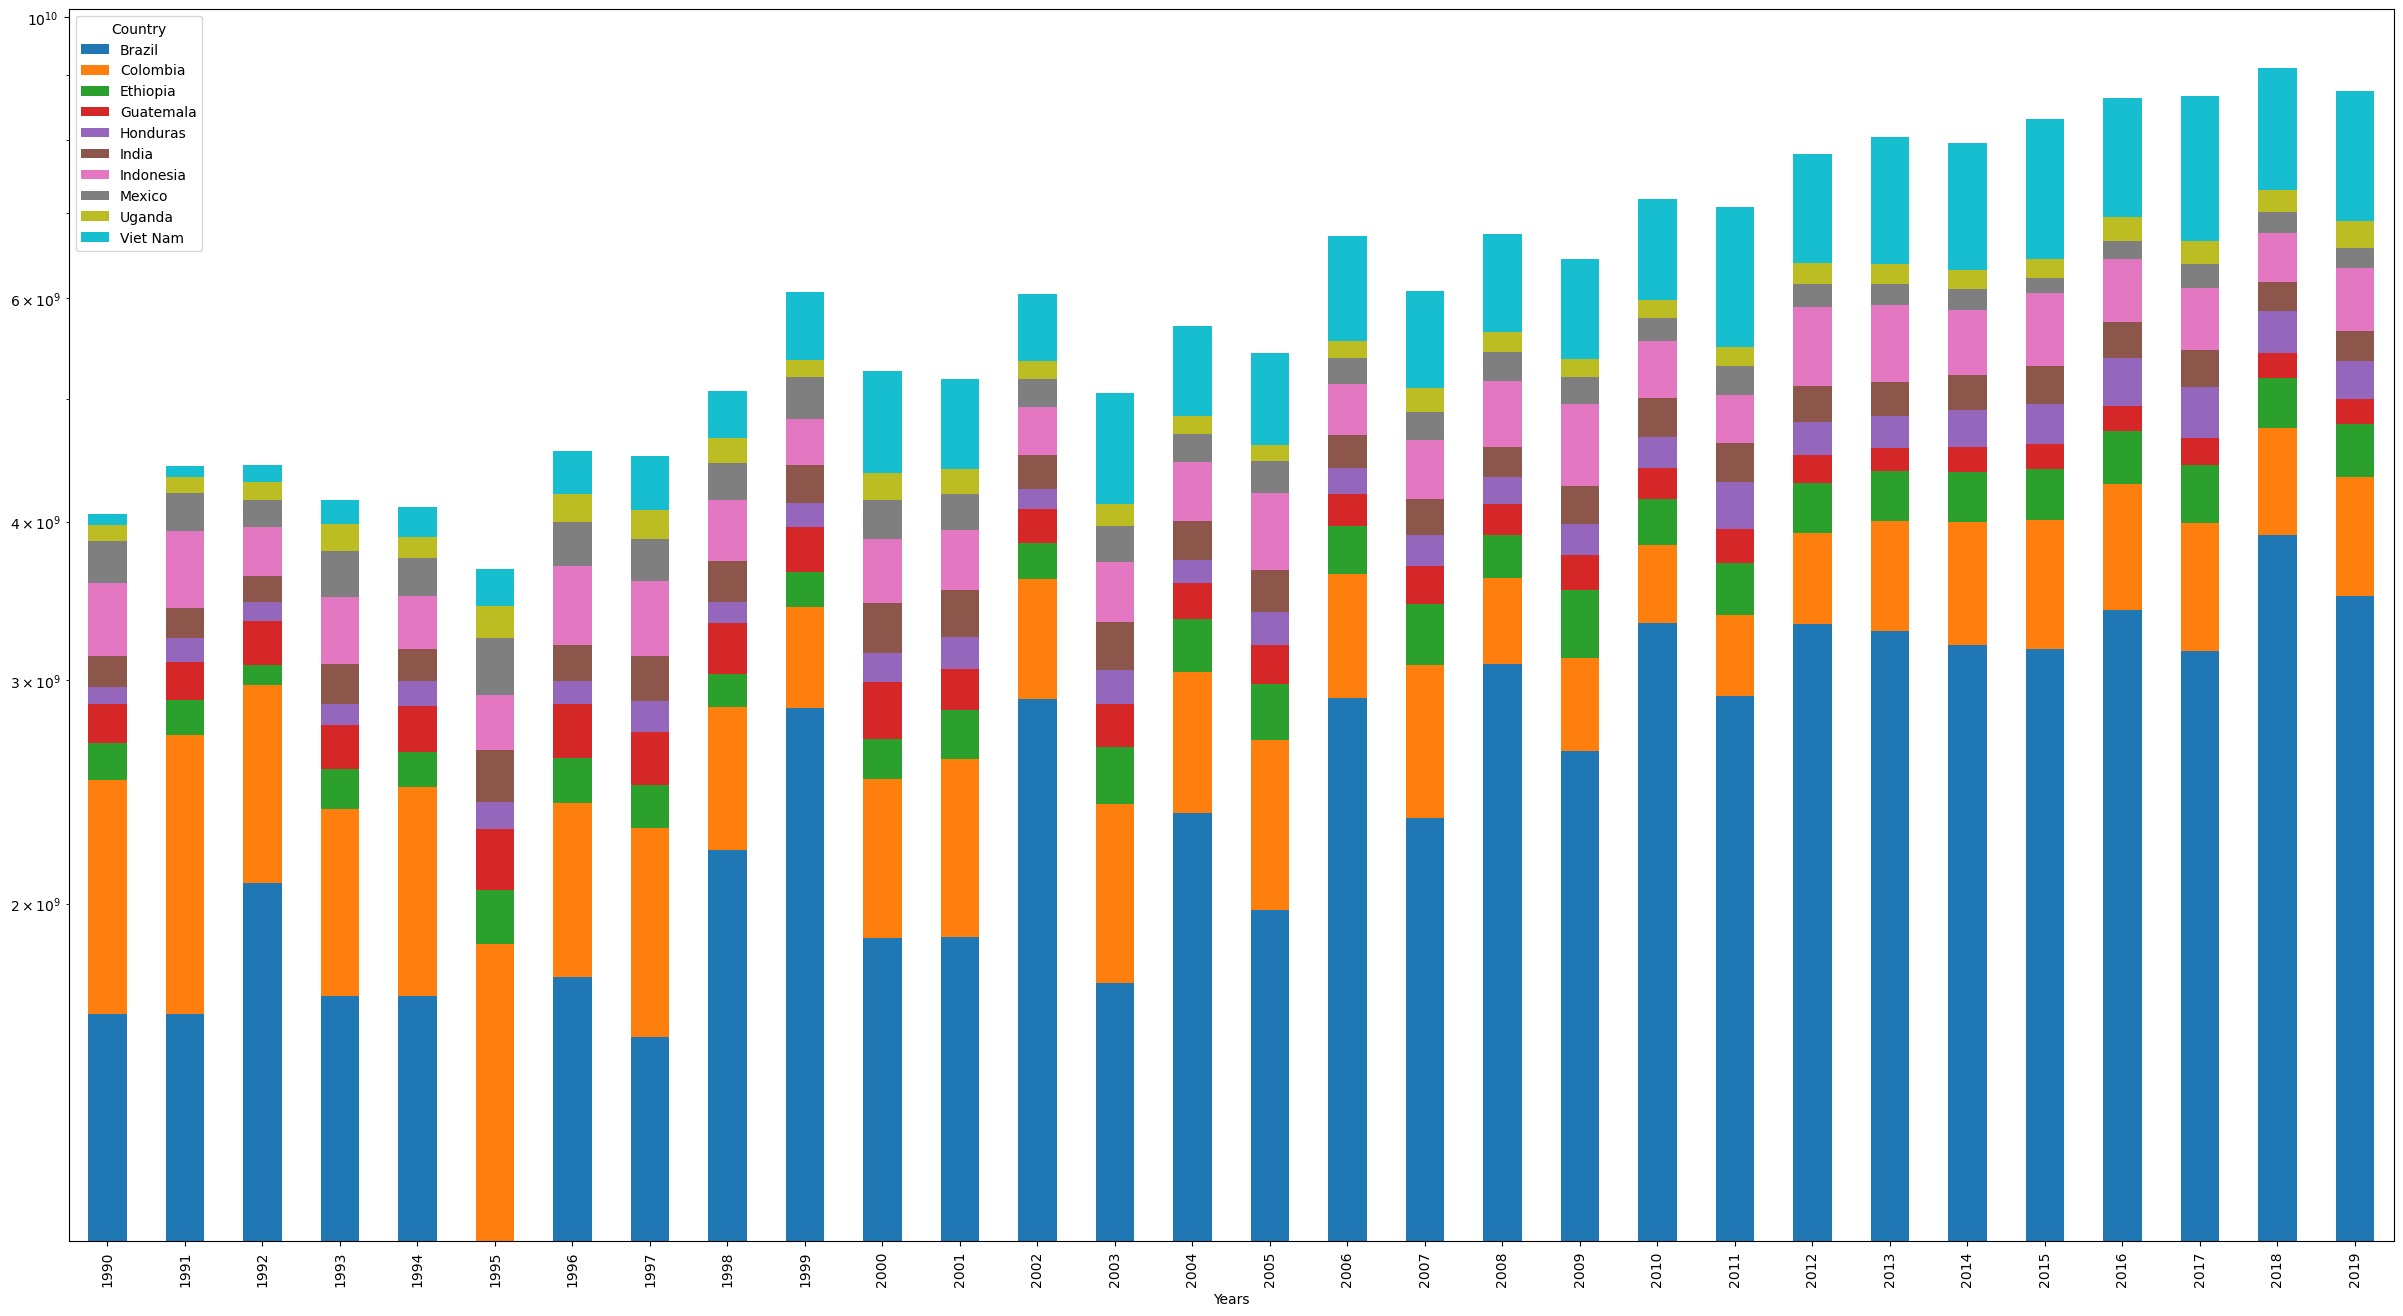

In [197]:
ax = years_countries_pivot.plot.bar(logy=True,stacked=True, figsize=(30,16))
ax